In [88]:
import pandas as pd
import xlrd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
pd.options.display.max_columns = 10
pd.options.display.max_rows = 10
import sklearn
from sklearn.linear_model import LinearRegression
from scipy import stats
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
#import statsmodels.formula.api as smf
#import statsmodels.api as sm

In [2]:
total_data = pd.read_csv("/users/siyaogu/Desktop/ORIE4741/Final_Project/county_analysis/clean_data_v3.csv")

/Users/siyaogu/anaconda/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2717: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
# Select columns that we will use
total_data.head(1)

,Health Service Area,Hospital County,Operating Certificate Number,Facility ID,Facility Name,...,Total Charges,Total Costs,Age Group Indicator,Admission Type Indicator,Patient Disposition Indicator
0,Western NY,Allegany,226700.0,37.0,Cuba Memorial Hospital Inc,...,5511.95,$5582.49,2,3,18


In [4]:
total_data.groupby("Gender").size().sort_values(ascending=False)

Gender
F    1150685
M     840085
U         56
dtype: int64

Gender: categorical, F/M/U, will probably delete U.

In [5]:
total_data.groupby("Race").size().sort_values(ascending=False)

Race
White                     1152488
Other Race                 472523
Black/African American     358743
Unknown                      7072
dtype: int64

Race: categorical, White/Other Race/Black,African American/Unknown, will probably delete unknown.

In [6]:
total_data.loc[total_data['Length of Stay']=='120 +','Length of Stay']=120 
total_data['Length of Stay'] = pd.to_numeric(total_data['Length of Stay'])
total_data.groupby("Length of Stay").size().sort_values(ascending=False)

Length of Stay
2      471511
3      368080
1      295605
4      211458
5      129964
        ...  
110        42
107        40
113        40
117        39
114        37
Length: 120, dtype: int64

Length of stay: numeric.

In [7]:
total_data.groupby("APR DRG Code").size().sort_values(ascending=False)

APR DRG Code
0      1334000
640     207578
560     151638
540      79687
720      66785
194      53957
139      49791
140      47390
dtype: int64

APR DRG Code: categorical, indicating the type of treatment. 0/640/560/540/720/194/139/140. 0 indicates "others".

In [8]:
total_data.groupby("APR Severity of Illness Description").size().sort_values(ascending=False)

APR Severity of Illness Description
Minor       724080
Moderate    702802
Major       424549
Extreme     139395
dtype: int64

APR Severity of Illness Description: categorical. 1/2/3/4. 1: minor, 4:extreme.

In [9]:
total_data.loc[total_data['Abortion Edit Indicator'] == 'N', 'Abortion Edit Indicator'] = 'N_abor'
total_data.loc[total_data['Abortion Edit Indicator'] == 'Y', 'Abortion Edit Indicator'] = 'Y_abor'
total_data.groupby("Abortion Edit Indicator").size().sort_values(ascending=False)

Abortion Edit Indicator
N_abor    1987873
Y_abor       2953
dtype: int64

Abortion Edit Indicator: categorical. N/Y.

In [10]:
total_data.loc[total_data['Emergency Department Indicator'] == 'N', 'Emergency Department Indicator'] = 'N_emer'
total_data.loc[total_data['Emergency Department Indicator'] == 'Y', 'Emergency Department Indicator'] = 'Y_emer'
total_data.groupby("Emergency Department Indicator").size().sort_values(ascending=False)

Emergency Department Indicator
Y_emer    1159570
N_emer     831256
dtype: int64

Emergency Department Indicator: categorical. Y/N.

In [11]:
total_data.loc[total_data['Age Group Indicator'] == 0, 'Age Group Indicator'] = '0_age'
total_data.loc[total_data['Age Group Indicator'] == 1, 'Age Group Indicator'] = '1_age'
total_data.loc[total_data['Age Group Indicator'] == 2, 'Age Group Indicator'] = '2_age'
total_data.loc[total_data['Age Group Indicator'] == 3, 'Age Group Indicator'] = '3_age'
total_data.loc[total_data['Age Group Indicator'] == 4, 'Age Group Indicator'] = '4_age'
total_data.groupby("Age Group Indicator").size().sort_values(ascending=False)

Age Group Indicator
4_age    570253
3_age    495608
2_age    366267
0_age    340107
1_age    218591
dtype: int64

Age Group Indicator: categorical. 4/3/2/1/0.

In [12]:
total_data.loc[total_data['Admission Type Indicator'] == 0, 'Admission Type Indicator'] = '0_admin'
total_data.loc[total_data['Admission Type Indicator'] == 1, 'Admission Type Indicator'] = '1_admin'
total_data.loc[total_data['Admission Type Indicator'] == 2, 'Admission Type Indicator'] = '2_admin'
total_data.loc[total_data['Admission Type Indicator'] == 3, 'Admission Type Indicator'] = '3_admin'
total_data.loc[total_data['Admission Type Indicator'] == 4, 'Admission Type Indicator'] = '4_admin'
total_data.loc[total_data['Admission Type Indicator'] == 5, 'Admission Type Indicator'] = '5_admin'
total_data.groupby("Admission Type Indicator").size().sort_values(ascending=False)

Admission Type Indicator
1_admin    1228454
3_admin     348381
4_admin     237301
2_admin     172853
5_admin       2354
0_admin       1483
dtype: int64

Admission Type Indicator: categorical. 0/1/2/3/4/5.

In [13]:
total_data.loc[total_data['Patient Disposition Indicator'] == 0, 'Patient Disposition Indicator'] = '0_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 1, 'Patient Disposition Indicator'] = '1_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 2, 'Patient Disposition Indicator'] = '2_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 3, 'Patient Disposition Indicator'] = '3_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 4, 'Patient Disposition Indicator'] = '4_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 5, 'Patient Disposition Indicator'] = '5_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 6, 'Patient Disposition Indicator'] = '6_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 7, 'Patient Disposition Indicator'] = '7_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 8, 'Patient Disposition Indicator'] = '8_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 9, 'Patient Disposition Indicator'] = '9_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 10, 'Patient Disposition Indicator'] = '10_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 11, 'Patient Disposition Indicator'] = '11_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 12, 'Patient Disposition Indicator'] = '12_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 13, 'Patient Disposition Indicator'] = '13_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 14, 'Patient Disposition Indicator'] = '14_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 15, 'Patient Disposition Indicator'] = '15_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 16, 'Patient Disposition Indicator'] = '16_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 17, 'Patient Disposition Indicator'] = '17_dispo'
total_data.loc[total_data['Patient Disposition Indicator'] == 18, 'Patient Disposition Indicator'] = '18_dispo'
total_data.groupby("Patient Disposition Indicator").size().sort_values(ascending=False)

Patient Disposition Indicator
18_dispo    1354596
17_dispo     246006
16_dispo     201246
15_dispo      45613
14_dispo      37563
             ...   
4_dispo        2294
3_dispo        1500
2_dispo         505
1_dispo         138
0_dispo          34
Length: 19, dtype: int64

Patient Disposition Indicator: categorical. 0-18.

The x's: Gender, Race, Length of Stay, APR DRG Code, APR Severity of Illness Description, Abortion Edit Indicator, Emergency Department Indicator, Age Group Indicator, Admission Type Indicator, Patient Disposition Indicator.

The y: Total Charges.

In [14]:
# Delete Gender = U
total_data = total_data[total_data['Gender'].isin(["F","M"])]

In [15]:
# Delete Race = unknown
total_data = total_data[total_data['Race'].isin(["Black/African American","Other Race","White"])]

In [16]:
# Set categorical variables
#total_data["Gender"] = total_data["Gender"].astype('category')
#total_data["Race"] = total_data["Race"].astype('category')
#total_data["APR DRG Code"] = total_data["APR DRG Code"].astype('category')
#total_data["APR Severity of Illness Code"] = total_data["APR Severity of Illness Code"].astype('category')
#total_data["Abortion Edit Indicator"] = total_data["Abortion Edit Indicator"].astype('category')
#total_data["Emergency Department Indicator"] = total_data["Emergency Department Indicator"].astype('category')
#total_data["Age Group Indicator"] = total_data["Age Group Indicator"].astype('category')
#total_data["Admission Type Indicator"] = total_data["Admission Type Indicator"].astype('category')
#total_data["Patient Disposition Indicator"] = total_data["Patient Disposition Indicator"].astype('category')

In [17]:
# Set numeric variables
total_data["Length of Stay"] = total_data["Length of Stay"].astype(float)

In [18]:
total_data = total_data[total_data["Hospital County"].isin(["Manhattan","Kings","Queens","Nassau","Bronx","Suffolk","Erie","Westchester","Monroe","Onondaga","Albany","Richmond"])]

In [19]:
total_data.groupby("Abortion Edit Indicator").size()

Abortion Edit Indicator
N_abor    1607648
dtype: int64

In [20]:
# Add dummy columns
total_data = total_data.join(pd.get_dummies(total_data["Gender"]))
total_data = total_data.join(pd.get_dummies(total_data["Race"]))
total_data = total_data.join(pd.get_dummies(total_data["APR DRG Code"]))
total_data = total_data.join(pd.get_dummies(total_data["APR Severity of Illness Description"]))
total_data = total_data.join(pd.get_dummies(total_data["Abortion Edit Indicator"]))
total_data = total_data.join(pd.get_dummies(total_data["Emergency Department Indicator"]))
total_data = total_data.join(pd.get_dummies(total_data["Age Group Indicator"]))
total_data = total_data.join(pd.get_dummies(total_data["Admission Type Indicator"]))
total_data = total_data.join(pd.get_dummies(total_data["Patient Disposition Indicator"]))
total_data = total_data.join(pd.get_dummies(total_data["Hospital County"]))

In [21]:
total_data.columns.values

array(['Health Service Area', 'Hospital County',
       'Operating Certificate Number', 'Facility ID', 'Facility Name',
       'Age Group', 'Zip Code - 3 digits', 'Gender', 'Race', 'Ethnicity',
       'Length of Stay', 'Type of Admission', 'Patient Disposition',
       'Discharge Year', 'CCS Diagnosis Code', 'CCS Diagnosis Description',
       'CCS Procedure Code', 'CCS Procedure Description', 'APR DRG Code',
       'APR DRG Description', 'APR MDC Code', 'APR MDC Description',
       'APR Severity of Illness Code',
       'APR Severity of Illness Description', 'APR Risk of Mortality',
       'APR Medical Surgical Description', 'Payment Typology 1',
       'Payment Typology 2', 'Payment Typology 3',
       'Attending Provider License Number',
       'Operating Provider License Number',
       'Other Provider License Number', 'Birth Weight',
       'Abortion Edit Indicator', 'Emergency Department Indicator',
       'Total Charges', 'Total Costs', 'Age Group Indicator',
       'Admission 

In [22]:
export_data = total_data[['Total Charges','Length of Stay','Gender', 'Race','APR DRG Code','APR Severity of Illness Description','Emergency Department Indicator','Age Group Indicator','Admission Type Indicator','Patient Disposition Indicator','Hospital County']]

In [23]:
#export_data.to_csv("/users/siyaogu/Desktop/ORIE4741/Final_Project/R_model/R_model.csv",index=False)

In [24]:
total_data["F"] = total_data["F"].astype('category')
total_data["M"] = total_data["M"].astype('category')
total_data["Black/African American"] = total_data["Black/African American"].astype('category')
total_data["Other Race"] = total_data["Other Race"].astype('category')
total_data["White"] = total_data["White"].astype('category')
total_data[0] = total_data[0].astype('category')
total_data[139] = total_data[139].astype('category')
total_data[140] = total_data[140].astype('category')
total_data[194] = total_data[194].astype('category')
total_data[540] = total_data[540].astype('category')
total_data[560] = total_data[560].astype('category')
total_data[640] = total_data[640].astype('category')
total_data[720] = total_data[720].astype('category')
total_data["Extreme"] = total_data["Extreme"].astype('category')
total_data["Major"] = total_data["Major"].astype('category')
total_data["Minor"] = total_data["Minor"].astype('category')
total_data["Moderate"] = total_data["Moderate"].astype('category')
total_data["N_abor"] = total_data["N_abor"].astype('category')
#total_data["Y_abor"] = total_data["Y_abor"].astype('category')
total_data["N_emer"] = total_data["N_emer"].astype('category')
total_data["Y_emer"] = total_data["Y_emer"].astype('category')
total_data["0_age"] = total_data["0_age"].astype('category')
total_data["1_age"] = total_data["1_age"].astype('category')
total_data["2_age"] = total_data["2_age"].astype('category')
total_data["3_age"] = total_data["3_age"].astype('category')
total_data["4_age"] = total_data["4_age"].astype('category')
total_data["0_admin"] = total_data["0_admin"].astype('category')
total_data["1_admin"] = total_data["1_admin"].astype('category')
total_data["2_admin"] = total_data["2_admin"].astype('category')
total_data["3_admin"] = total_data["3_admin"].astype('category')
total_data["4_admin"] = total_data["4_admin"].astype('category')
total_data["5_admin"] = total_data["5_admin"].astype('category')
total_data["0_dispo"] = total_data["0_dispo"].astype('category')
total_data["10_dispo"] = total_data["10_dispo"].astype('category')
total_data["11_dispo"] = total_data["11_dispo"].astype('category')
total_data["12_dispo"] = total_data["12_dispo"].astype('category')
total_data["13_dispo"] = total_data["13_dispo"].astype('category')
total_data["14_dispo"] = total_data["14_dispo"].astype('category')
total_data["15_dispo"] = total_data["15_dispo"].astype('category')
total_data["16_dispo"] = total_data["16_dispo"].astype('category')
total_data["17_dispo"] = total_data["17_dispo"].astype('category')
total_data["18_dispo"] = total_data["18_dispo"].astype('category')
total_data["1_dispo"] = total_data["1_dispo"].astype('category')
total_data["2_dispo"] = total_data["2_dispo"].astype('category')
total_data["3_dispo"] = total_data["3_dispo"].astype('category')
total_data["4_dispo"] = total_data["4_dispo"].astype('category')
total_data["5_dispo"] = total_data["5_dispo"].astype('category')
total_data["6_dispo"] = total_data["6_dispo"].astype('category')
total_data["7_dispo"] = total_data["7_dispo"].astype('category')
total_data["8_dispo"] = total_data["8_dispo"].astype('category')
total_data["9_dispo"] = total_data["9_dispo"].astype('category')
total_data["Manhattan"] = total_data["Manhattan"].astype('category')
total_data["Kings"] = total_data["Kings"].astype('category')
total_data["Queens"] = total_data["Queens"].astype('category')
total_data["Nassau"] = total_data["Nassau"].astype('category')
total_data["Bronx"] = total_data["Bronx"].astype('category')
total_data["Suffolk"] = total_data["Suffolk"].astype('category')
total_data["Erie"] = total_data["Erie"].astype('category')
total_data["Westchester"] = total_data["Westchester"].astype('category')
total_data["Monroe"] = total_data["Monroe"].astype('category')
total_data["Onondaga"] = total_data["Onondaga"].astype('category')
total_data["Albany"] = total_data["Albany"].astype('category')
total_data["Richmond"] = total_data["Richmond"].astype('category')

In [125]:
# Train -> 80%, Test -> 20%
X_train, X_test, Y_train, Y_test = train_test_split(total_data, total_data['Total Charges'], test_size=0.2)

In [44]:
X_hos = X_train[['Length of Stay','F',
       #'M', 
       'Black/African American', 'Other Race',
       #'White', 
       #0, 
       139, 140, 194, 540, 560, 640, 720, 
       #'Extreme', 
       'Major', 'Minor', 'Moderate',
       #'N_emer', 
       'Y_emer', 
       #'0_age', 
       '1_age', '2_age', '3_age', '4_age', 
       #'0_admin', 
       '1_admin', '2_admin', '3_admin', '4_admin', '5_admin', '0_dispo', 
       '10_dispo', '11_dispo', '12_dispo', '13_dispo', '14_dispo', '15_dispo',
       '16_dispo', '17_dispo', 
       #'18_dispo', 
       '1_dispo', '2_dispo', '3_dispo',
       '4_dispo', '5_dispo', '6_dispo', '7_dispo', '8_dispo', '9_dispo',
       #"Manhattan",
       "Kings","Queens","Nassau","Bronx","Suffolk","Erie","Westchester","Monroe","Onondaga","Albany","Richmond"]]

In [51]:
pd.options.display.max_rows = 60
lm_hos = LinearRegression()
lm_hos.fit(X_hos, Y_train)
pd.DataFrame(zip(X_hos.columns, lm_hos.coef_), columns = ['features', 'estimatedCoefficients'])

,features,estimatedCoefficients
0,Length of Stay,5053.651235
1,F,-1781.139569
2,Black/African American,-4411.964029
3,Other Race,341.813627
4,139,-8020.254340
5,140,-8769.370335
6,194,-7657.515493
7,540,-10847.389472
8,560,-9150.958755
9,640,-22993.830887


In [27]:
export_data = total_data[['Total Charges','Length of Stay','F',
       'M', 
       'Black/African American', 'Other Race',
       'White', 
       0, 
       139, 140, 194, 540, 560, 640, 720, 
       'Extreme', 
       'Major', 'Minor', 'Moderate',
       'N_emer', 
       'Y_emer', 
       '0_age', 
       '1_age', '2_age', '3_age', '4_age', 
       '0_admin', 
       '1_admin', '2_admin', '3_admin', '4_admin', '5_admin', 
       '0_dispo', 
       '10_dispo', '11_dispo', '12_dispo', '13_dispo', '14_dispo', '15_dispo',
       '16_dispo', '17_dispo', '18_dispo', '1_dispo', '2_dispo', '3_dispo',
       '4_dispo', '5_dispo', '6_dispo', '7_dispo', '8_dispo', '9_dispo',
       "Manhattan",
       "Kings","Queens","Nassau","Bronx","Suffolk","Erie","Westchester","Monroe","Onondaga","Albany","Richmond"]]

In [28]:
#export_data.to_csv("/users/siyaogu/Desktop/ORIE4741/Final_Project/linear_model/linear_model.csv",index=False)

In [29]:
pd.options.display.max_rows = 10

In [52]:
lm_hos.score(X_hos,Y_train)

0.56710418644787941

In [127]:
X_test = X_test[['Length of Stay','F',
       #'M', 
       'Black/African American', 'Other Race',
       #'White', 
       #0, 
       139, 140, 194, 540, 560, 640, 720, 
       #'Extreme', 
       'Major', 'Minor', 'Moderate',
       #'N_emer', 
       'Y_emer', 
       #'0_age', 
       '1_age', '2_age', '3_age', '4_age', 
       #'0_admin', 
       '1_admin', '2_admin', '3_admin', '4_admin', '5_admin', '0_dispo', 
       '10_dispo', '11_dispo', '12_dispo', '13_dispo', '14_dispo', '15_dispo',
       '16_dispo', '17_dispo', 
       #'18_dispo', 
       '1_dispo', '2_dispo', '3_dispo',
       '4_dispo', '5_dispo', '6_dispo', '7_dispo', '8_dispo', '9_dispo',
       #"Manhattan",
       "Kings","Queens","Nassau","Bronx","Suffolk","Erie","Westchester","Monroe","Onondaga","Albany","Richmond"]]

In [56]:
# Training MSE
Y_hos_pred_train = lm_hos.predict(X_hos)
mean_squared_error(Y_train.values, Y_hos_pred_train)

2062725314.4597545

In [128]:
# Test MSE
Y_hos_pred = lm_hos.predict(X_test)
mean_squared_error(Y_test.values, Y_hos_pred)

2197249894.9774241

In [129]:
x = list(range(1, len(Y_test)+1, 1))
len(x)

321530

([], <a list of 0 Text xticklabel objects>)

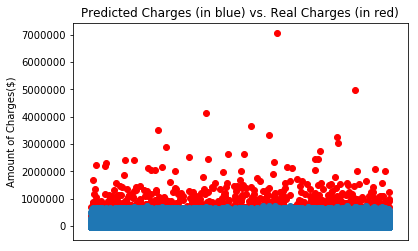

In [75]:
plt.scatter(x,Y_test.values,color='red')
plt.scatter(x,Y_hos_pred)
plt.title('Predicted Charges (in blue) vs. Real Charges (in red)')
plt.ylabel('Amount of Charges($)')
plt.xticks([])

In [111]:
len(Y_test[Y_test<700000])

321006

In [112]:
len(Y_test[Y_test>700000])

524

In [113]:
len(Y_hos_pred[Y_hos_pred>700000])

4

In [124]:
Y_test_delete7000000 = Y_test[Y_test<700000]
Y_hos_pred_delete7000000 = Y_hos_pred[Y_test<700000]
mean_squared_error(Y_test_delete7000000, Y_hos_pred_delete7000000)

1182580899.5756168

Wrap-up: The high MSE is mainly caused by extreme values.

In [96]:
pd.options.display.max_rows = 60
ridge_hos = Ridge(alpha=5000,normalize=True)
ridge_hos.fit(X_hos,Y_train)
pd.DataFrame(zip(X_hos.columns, ridge_hos.coef_), columns = ['features', 'estimatedCoefficients'])
#y_pred_ridge = ridge_hos.predict(X_test)

,features,estimatedCoefficients
0,Length of Stay,1.113613
1,F,-1.675722
2,Black/African American,-0.596915
3,Other Race,-0.377413
4,139,-1.800062
...,...,...
48,Westchester,1.003198
49,Monroe,-3.337657
50,Onondaga,-1.965886
51,Albany,0.433818


In [163]:
pd.options.display.max_rows = 10
# Traning MSE
Y_ridge_hos_pred_train = ridge_hos.predict(X_hos)
mean_squared_error(Y_train.values, Y_ridge_hos_pred_train)

4770047343.7881908

In [164]:
# Test MSE
Y_pred_ridge = ridge_hos.predict(X_test)
mean_squared_error(Y_test.values, Y_pred_ridge)

4855448704.3688002

([], <a list of 0 Text xticklabel objects>)

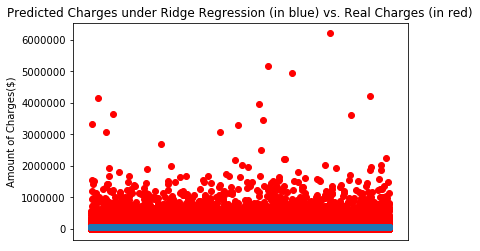

In [165]:
x = list(range(1, len(Y_test)+1, 1))
len(x)
plt.scatter(x,Y_test.values,color='red')
plt.scatter(x,Y_pred_ridge)
plt.title('Predicted Charges under Ridge Regression (in blue) vs. Real Charges (in red)')
plt.ylabel('Amount of Charges($)')
plt.xticks([])